In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [36]:
# Загрузка данных
df = pd.read_csv("parkinson_full_dataset.csv")

# EDA (Exploratory Data Analysis)

In [37]:
# Первичный анализ данных
print("Первые 5 записей:")
print(df.head())

Первые 5 записей:
                                                name  MDVP:Fo(Hz)  \
0  AH_545616858-3A749CBC-3FEB-4D35-820E-E45C3E5B9B6A   346.868837   
1  AH_545622717-461DFFFE-54AF-42AF-BA78-528BD505D624   305.239161   
2  AH_545622718-C052AD58-5E6B-4ADC-855C-F76B66BAFA6E   335.625916   
3  AH_545622719-52C23861-6E0D-41E0-A3D8-9358C28C019B   380.140581   
4  AH_545622720-E1486AF6-8C95-47EB-829B-4D62698C987A   444.398635   

   MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  \
0    373.459560    171.258851        1.554254          5.391223  0.910781   
1    381.656226    282.169962        0.703627          2.147746  0.699577   
2    477.554996    299.496028        4.082442         13.701733  4.141204   
3    459.066193    130.912679        6.042509         22.970027  4.823468   
4    455.012487    425.171280        0.294587          1.309140  0.264586   

   MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  Shimmer:DDA       NHR        HNR  \
0  1.476100    2.732342 

In [38]:
print("\nСтатистические характеристики:")
print(df.describe().transpose())


Статистические характеристики:
                  count        mean         std         min         25%  \
MDVP:Fo(Hz)        81.0  333.360417   68.998407  208.869514  278.815644   
MDVP:Fhi(Hz)       81.0  381.947847   85.597921  238.932505  301.804722   
MDVP:Flo(Hz)       81.0  240.041842  108.333649   50.096630  162.949543   
MDVP:Jitter(%)     81.0    3.045462    3.784046    0.149720    0.344006   
MDVP:Jitter(Abs)   81.0    9.778752   12.167596    0.386581    1.232717   
MDVP:RAP           81.0    2.101195    2.602147    0.119450    0.291500   
MDVP:PPQ           81.0    3.117187    4.200046    0.101860    0.237570   
Jitter:DDP         81.0    6.303585    7.806441    0.358350    0.874499   
MDVP:Shimmer       81.0   17.602035    4.574661    8.195782   14.746185   
MDVP:Shimmer(dB)   81.0  -15.401228    2.405896  -21.728192  -16.626406   
Shimmer:APQ3       81.0    4.921361    2.011436    1.360908    3.598418   
Shimmer:APQ5       81.0    9.902396    3.446033    2.920032    7.451

In [39]:
print("\nИнформация о данных:")
print(df.info())


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              81 non-null     object 
 1   MDVP:Fo(Hz)       81 non-null     float64
 2   MDVP:Fhi(Hz)      81 non-null     float64
 3   MDVP:Flo(Hz)      81 non-null     float64
 4   MDVP:Jitter(%)    81 non-null     float64
 5   MDVP:Jitter(Abs)  81 non-null     float64
 6   MDVP:RAP          81 non-null     float64
 7   MDVP:PPQ          81 non-null     float64
 8   Jitter:DDP        81 non-null     float64
 9   MDVP:Shimmer      81 non-null     float64
 10  MDVP:Shimmer(dB)  81 non-null     float64
 11  Shimmer:APQ3      81 non-null     float64
 12  Shimmer:APQ5      81 non-null     float64
 13  MDVP:APQ          81 non-null     float64
 14  Shimmer:DDA       81 non-null     float64
 15  NHR               81 non-null     float64
 16  HNR               81 non

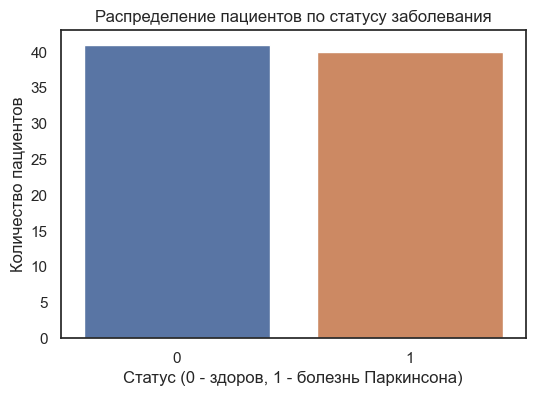

In [40]:
# Визуализация распределения целевой переменной
plt.figure(figsize=(6, 4))
sns.countplot(x='status', data=df)
plt.title('Распределение пациентов по статусу заболевания')
plt.xlabel('Статус (0 - здоров, 1 - болезнь Паркинсона)')
plt.ylabel('Количество пациентов')
plt.show()

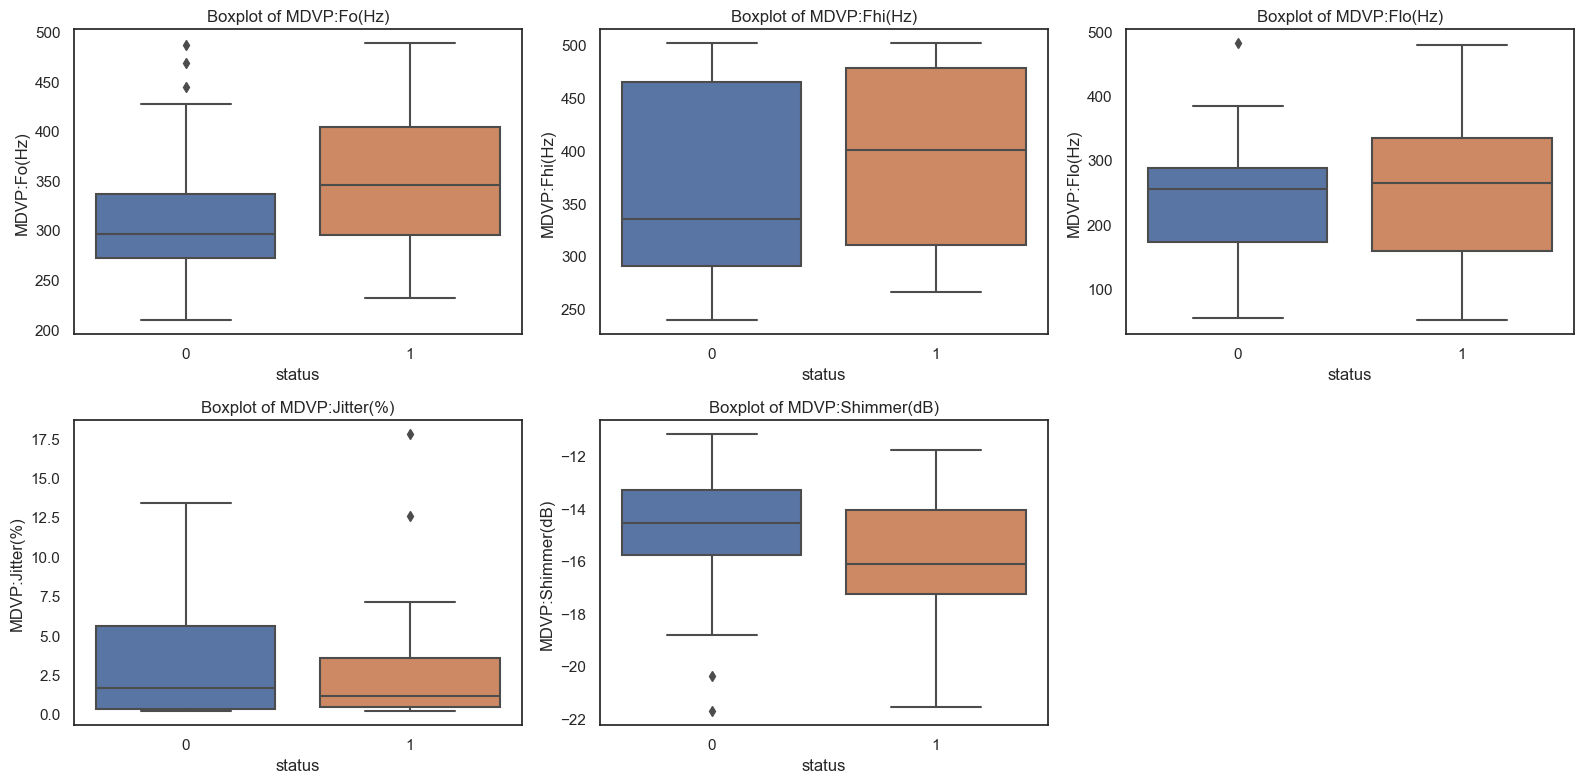

In [41]:
selected_features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Shimmer(dB)']
plt.figure(figsize=(16, 8))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='status', y=feature, data=df)
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

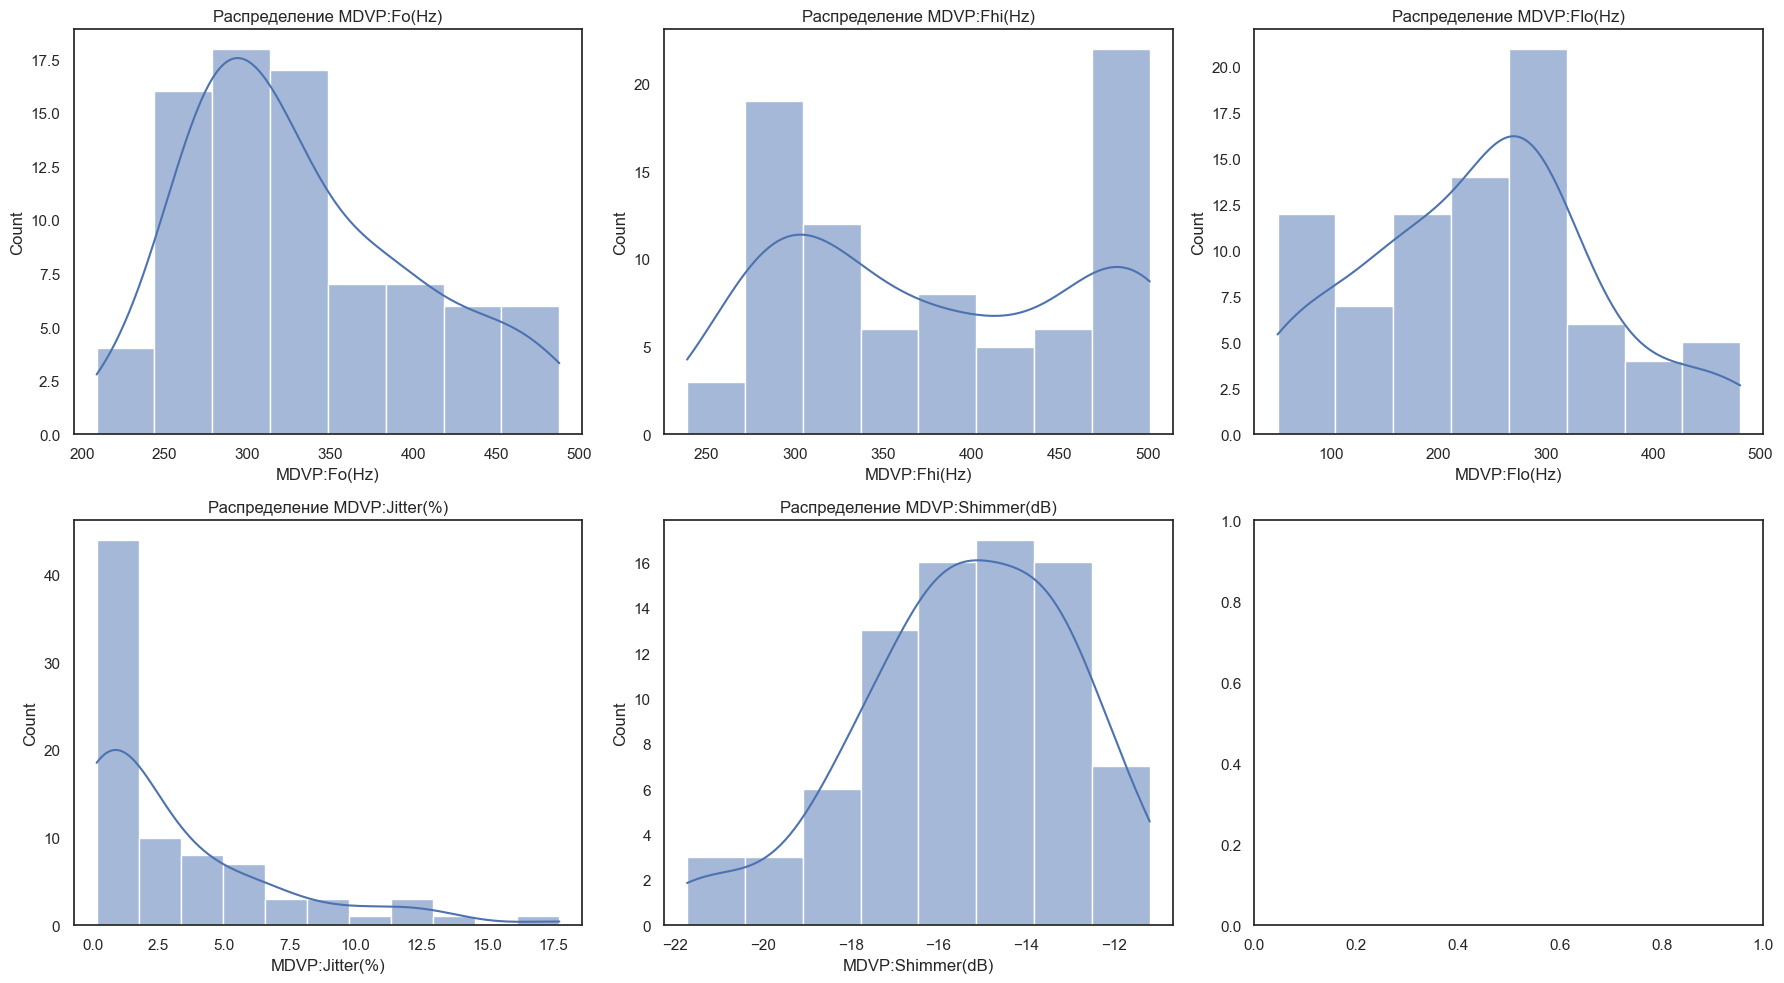

In [42]:
# Графики распределения признаков
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for i, feature in enumerate(selected_features):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Распределение {feature}')
plt.tight_layout()
plt.show()

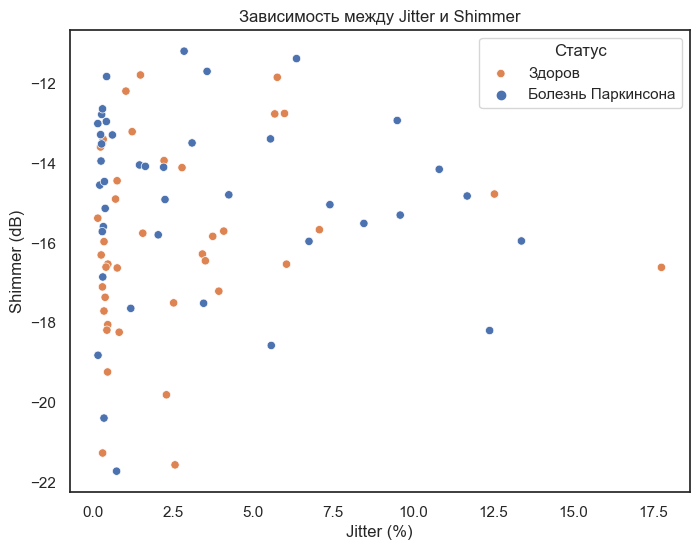

In [43]:
# Анализ взаимосвязи признаков
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='MDVP:Jitter(%)', y='MDVP:Shimmer(dB)', hue='status')
plt.title('Зависимость между Jitter и Shimmer')
plt.xlabel('Jitter (%)')
plt.ylabel('Shimmer (dB)')
plt.legend(title='Статус', labels=['Здоров', 'Болезнь Паркинсона'])
plt.show()

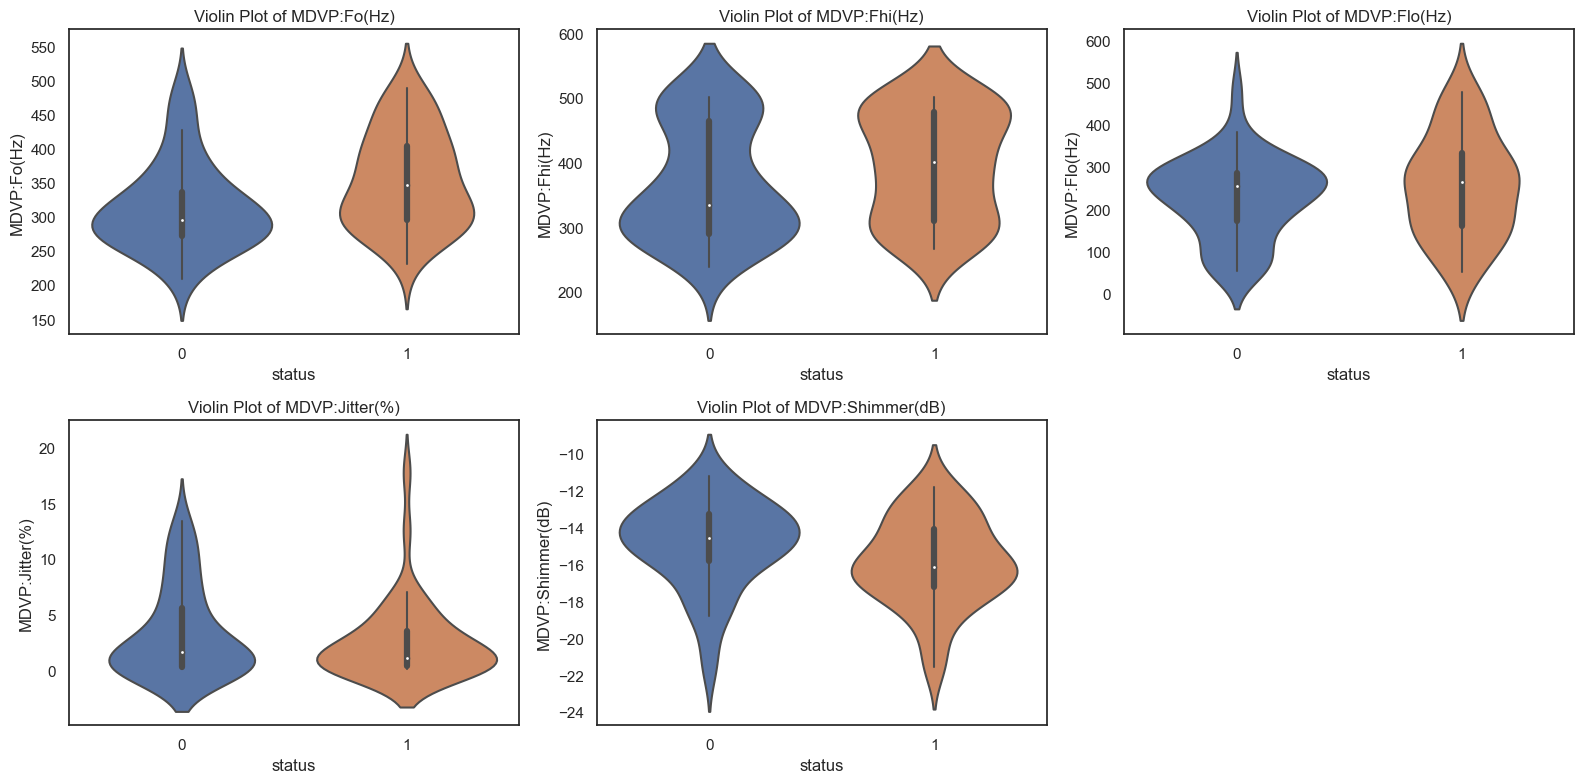

In [44]:
plt.figure(figsize=(16, 8))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='status', y=feature, data=df)
    plt.title(f'Violin Plot of {feature}')

plt.tight_layout()
plt.show()

In [82]:
df.drop('D2', axis=1, inplace=True)

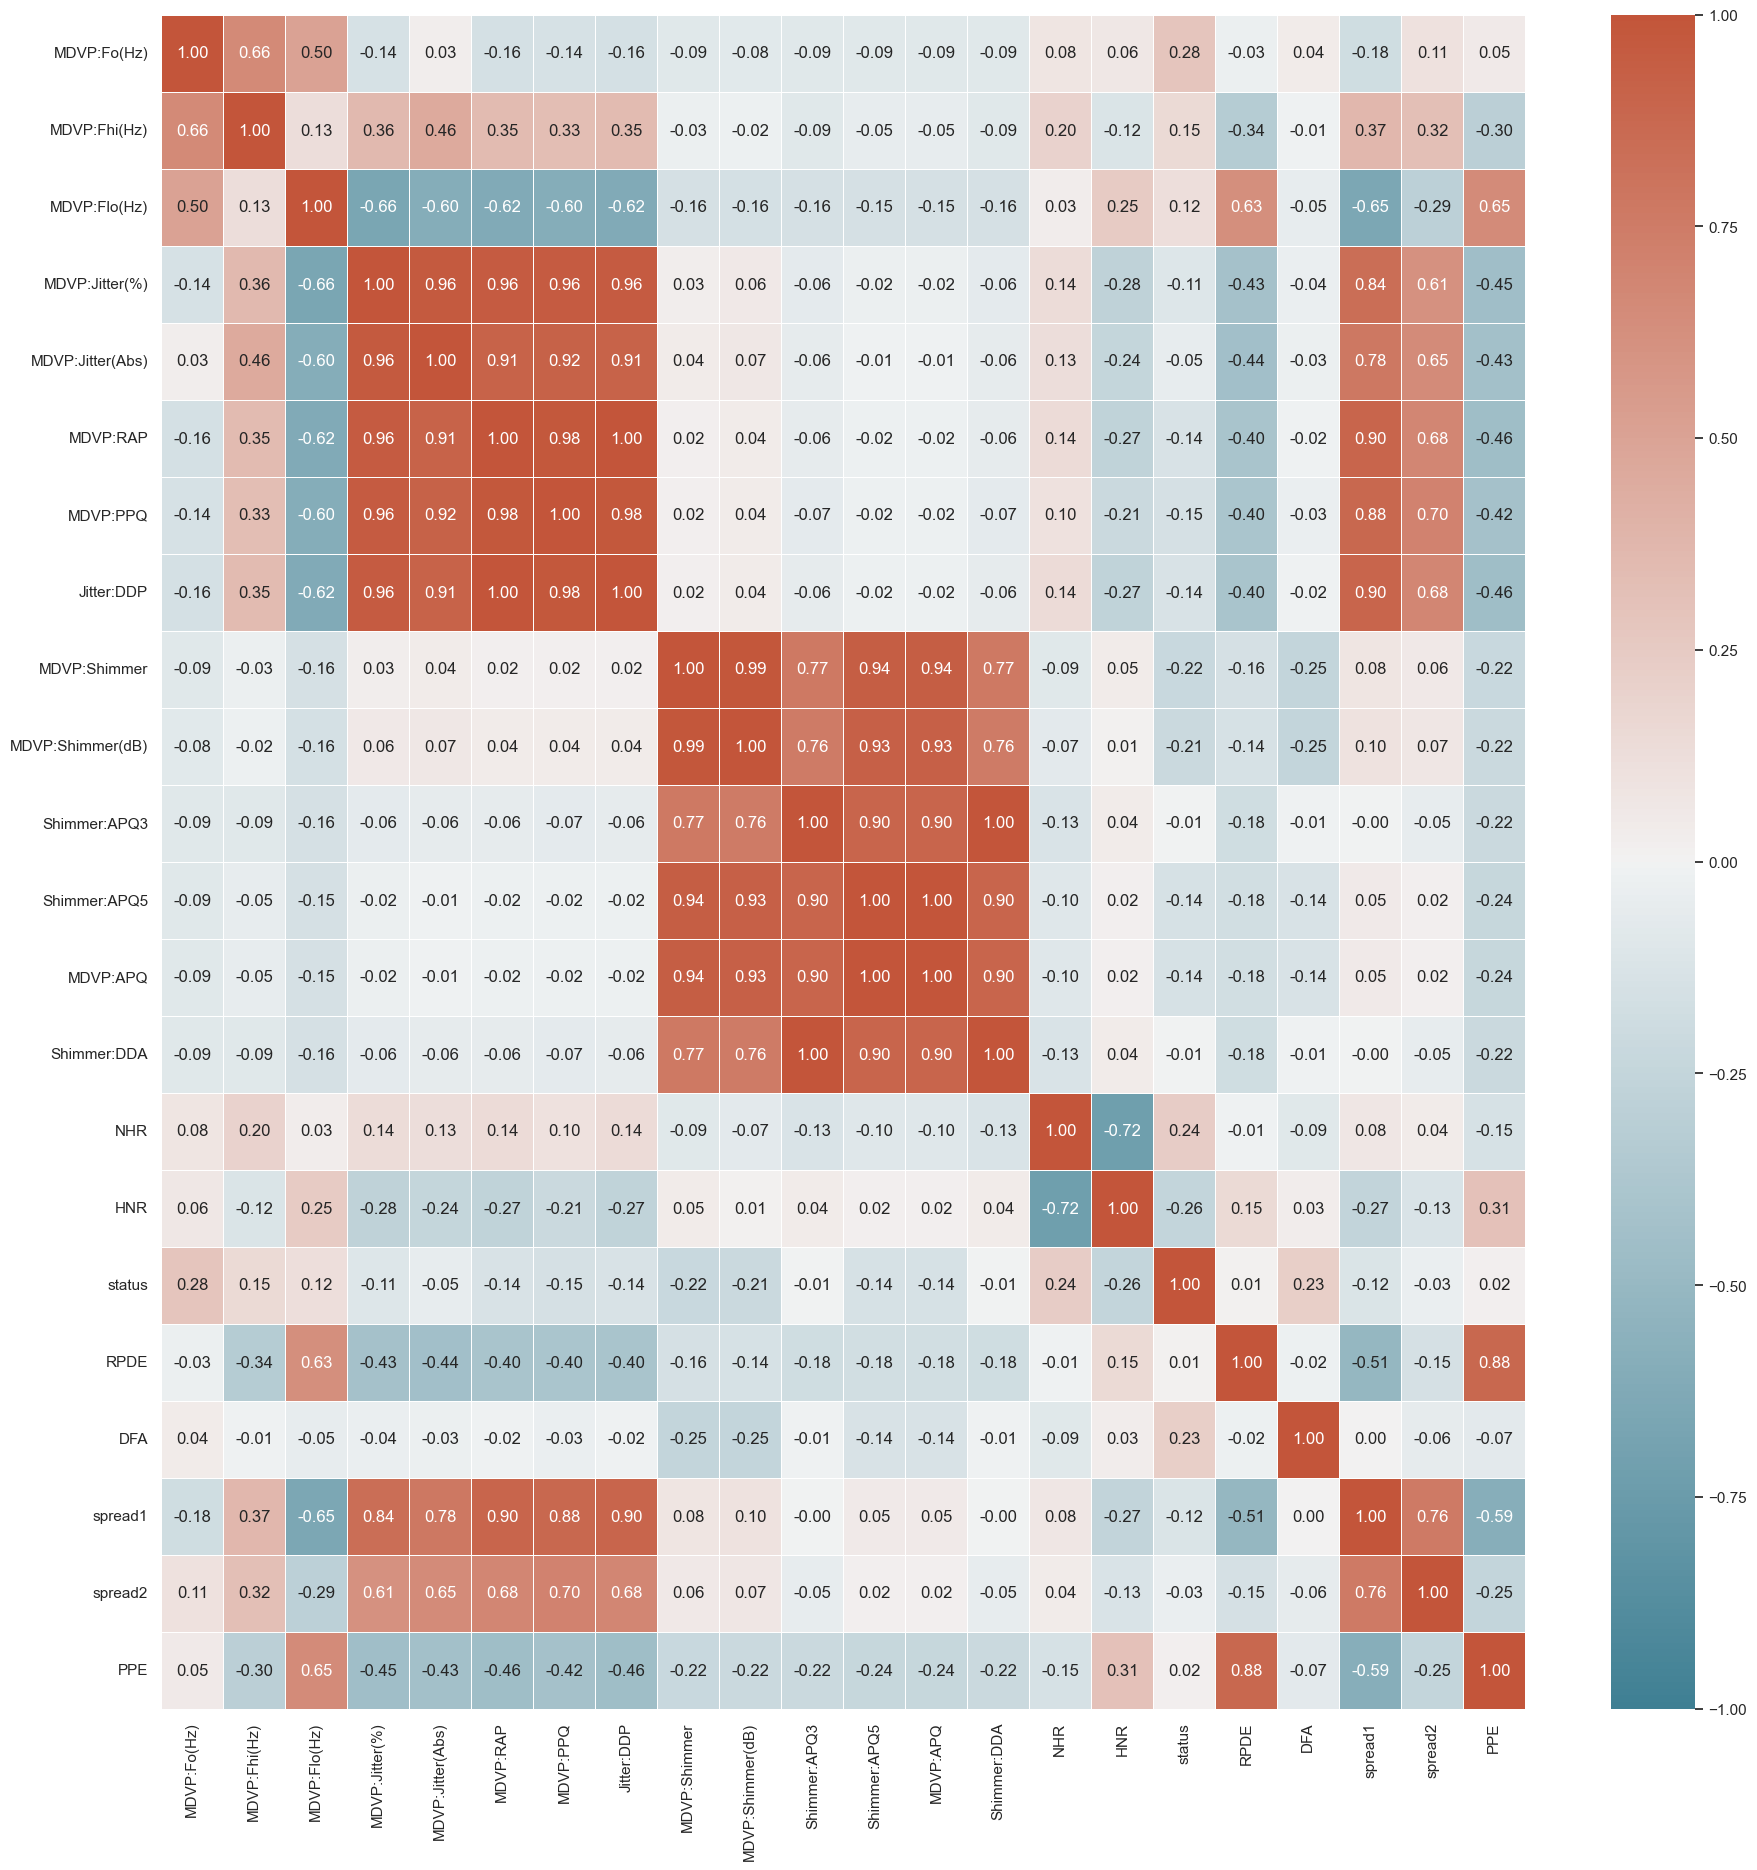

In [83]:
# Матрица корреляции
corr_matrix = df.corr(method="pearson")
plt.figure(figsize=(corr_matrix.shape))
sns.set_theme(style="white")
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
plt.show()

In [46]:
# Подготовка данных для моделирования
df_without_name = df.drop('name', axis=1)

X = df_without_name.drop('status', axis=1)
y = df_without_name['status']

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)


In [47]:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Пропущенные значения X_train_scaled:")
print(X_train_scaled_df.isnull().sum())


Пропущенные значения X_train_scaled:
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [48]:
# Применение PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC_{i+1}' for i in range(X_train_pca.shape[1])])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC_{i+1}' for i in range(X_test_pca.shape[1])])

print("\nX_train_pca:")
print(X_train_pca_df.head())

print("\nX_test_pca:")
print(X_test_pca_df.head())



X_train_pca:
       PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0  3.617318  2.657171  0.678081  0.695901  0.060932  0.675492  1.913218   
1 -3.074756  1.103535  2.990050  1.591625  0.701599  0.279005 -0.607860   
2 -0.811903 -0.918193 -0.174498 -0.985872  1.721988 -1.238754  0.293337   
3 -0.436271  6.254144  0.566339 -1.405005  1.097957  0.076786  0.136250   
4  0.670777  0.954555  0.037182 -1.341222  0.857347 -0.681713  0.207902   

       PC_8  
0  1.192925  
1 -0.494343  
2 -0.435449  
3  0.981818  
4  0.955027  

X_test_pca:
       PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0 -2.677452 -0.791792 -0.353918  0.122699  0.422526  2.927793 -0.413394   
1 -0.952877  0.323942 -0.558017 -0.320619  1.129479 -0.785984  0.234245   
2 -2.839786 -1.844702  0.702889  1.099169  0.735853  0.046171 -0.094970   
3  0.255346 -0.409383 -0.977045 -1.254415  0.170083 -0.495127 -0.039408   
4 -2.703249  3.042438 -0.983414  1.233030 -0.795981  1.722744 -

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, f1_score
)

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)

    # Метрики
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average=None)
    recall = recall_score(y_test, predictions, average=None)
    f1 = f1_score(y_test, predictions, average=None)
    report = classification_report(y_test, predictions, target_names=['Здоров', 'Болезнь Паркинсона'])
    matrix = confusion_matrix(y_test, predictions)

    # Печать
    print(f"Точность модели (Accuracy): {accuracy:.2f}")
    print("\nОтчет классификации:")
    print(report)
    print("\nМатрица ошибок:")
    print(matrix)

    # Визуализация матрицы ошибок
    plt.figure(figsize=(6, 5))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Здоров', 'Болезнь'],
                yticklabels=['Здоров', 'Болезнь'])
    plt.xlabel('Предсказано')
    plt.ylabel('Истинное значение')
    plt.title('Матрица ошибок')
    plt.tight_layout()
    plt.show()

    # Возврат всех метрик
    metrics = {
        'accuracy': accuracy,
        'precision': {
            'Здоров': precision[0],
            'Болезнь Паркинсона': precision[1]
        },
        'recall': {
            'Здоров': recall[0],
            'Болезнь Паркинсона': recall[1]
        },
        'f1_score': {
            'Здоров': f1[0],
            'Болезнь Паркинсона': f1[1]
        }
    }

    return metrics



=== Метод опорных векторов ===
Точность модели (Accuracy): 0.82

Отчет классификации:
                    precision    recall  f1-score   support

            Здоров       0.80      0.67      0.73         6
Болезнь Паркинсона       0.83      0.91      0.87        11

          accuracy                           0.82        17
         macro avg       0.82      0.79      0.80        17
      weighted avg       0.82      0.82      0.82        17


Матрица ошибок:
[[ 4  2]
 [ 1 10]]


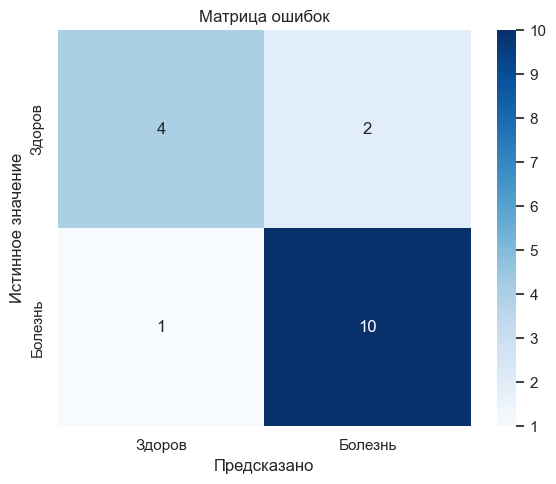

In [70]:
# Обучение и оценка моделей
print("\n=== Метод опорных векторов ===")
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)
svm_metrics = evaluate_model(svm, X_test_scaled, y_test)


=== Случайный лес ===
Точность модели (Accuracy): 0.47

Отчет классификации:
                    precision    recall  f1-score   support

            Здоров       0.33      0.50      0.40         6
Болезнь Паркинсона       0.62      0.45      0.53        11

          accuracy                           0.47        17
         macro avg       0.48      0.48      0.46        17
      weighted avg       0.52      0.47      0.48        17


Матрица ошибок:
[[3 3]
 [6 5]]


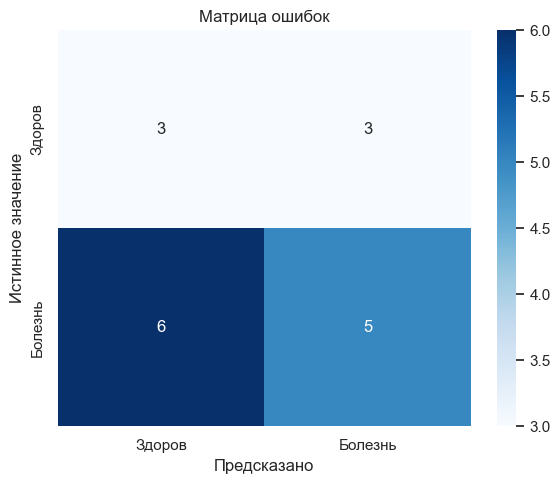

In [71]:
print("\n=== Случайный лес ===")
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
rf_metrics = evaluate_model(rf, X_test_scaled, y_test)



=== Метод k-ближайших соседей ===
Точность модели (Accuracy): 0.59

Отчет классификации:
                    precision    recall  f1-score   support

            Здоров       0.44      0.67      0.53         6
Болезнь Паркинсона       0.75      0.55      0.63        11

          accuracy                           0.59        17
         macro avg       0.60      0.61      0.58        17
      weighted avg       0.64      0.59      0.60        17


Матрица ошибок:
[[4 2]
 [5 6]]


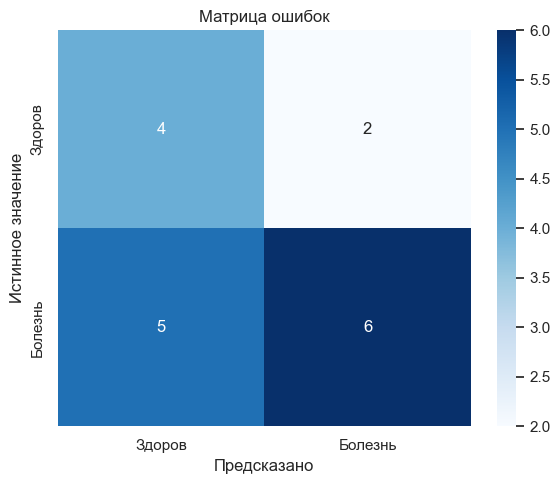

In [72]:
print("\n=== Метод k-ближайших соседей ===")
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_metrics = evaluate_model(knn, X_test_scaled, y_test)



=== Логистическая регрессия ===
Точность модели (Accuracy): 0.76

Отчет классификации:
                    precision    recall  f1-score   support

            Здоров       0.67      0.67      0.67         6
Болезнь Паркинсона       0.82      0.82      0.82        11

          accuracy                           0.76        17
         macro avg       0.74      0.74      0.74        17
      weighted avg       0.76      0.76      0.76        17


Матрица ошибок:
[[4 2]
 [2 9]]


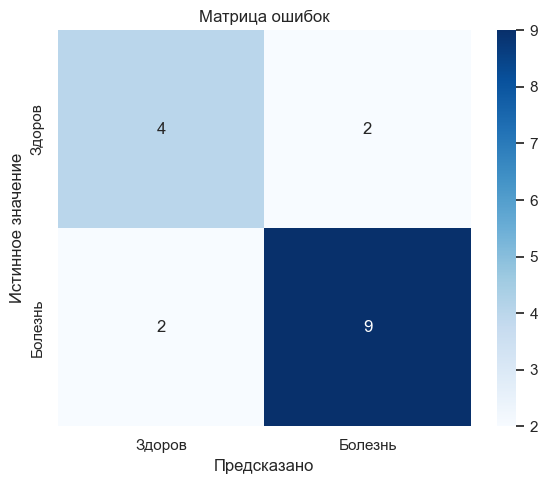

In [73]:
print("\n=== Логистическая регрессия ===")
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)
logreg_metrics = evaluate_model(logreg, X_test_scaled, y_test)



=== Дерево решений ===
Точность модели (Accuracy): 0.65

Отчет классификации:
                    precision    recall  f1-score   support

            Здоров       0.50      0.50      0.50         6
Болезнь Паркинсона       0.73      0.73      0.73        11

          accuracy                           0.65        17
         macro avg       0.61      0.61      0.61        17
      weighted avg       0.65      0.65      0.65        17


Матрица ошибок:
[[3 3]
 [3 8]]


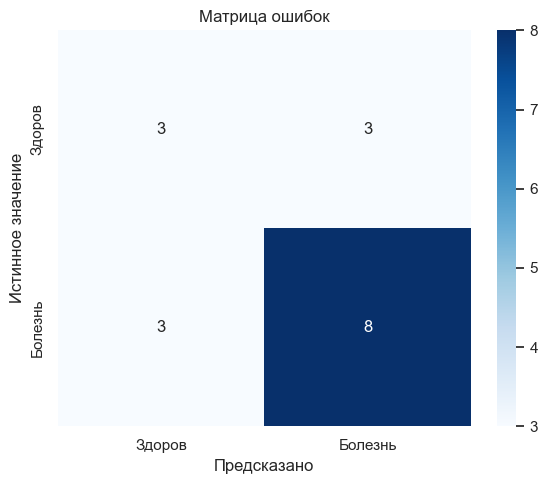

In [74]:
print("\n=== Дерево решений ===")
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
dt_metrics = evaluate_model(dt, X_test_scaled, y_test)



=== Градиентный бустинг ===
Точность модели (Accuracy): 0.76

Отчет классификации:
                    precision    recall  f1-score   support

            Здоров       0.62      0.83      0.71         6
Болезнь Паркинсона       0.89      0.73      0.80        11

          accuracy                           0.76        17
         macro avg       0.76      0.78      0.76        17
      weighted avg       0.80      0.76      0.77        17


Матрица ошибок:
[[5 1]
 [3 8]]


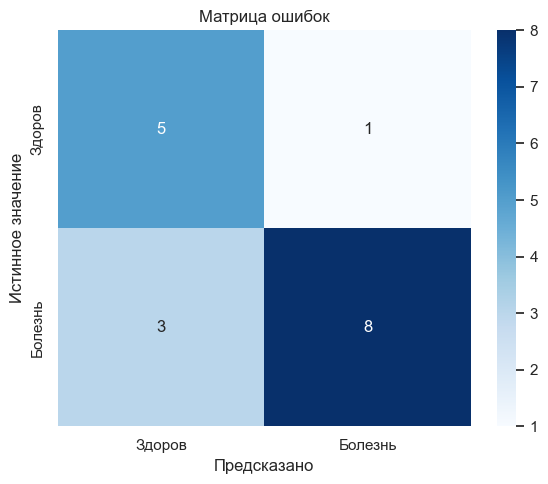

In [75]:
print("\n=== Градиентный бустинг ===")
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)
gb_metrics = evaluate_model(gb, X_test_scaled, y_test)


In [84]:
# Сводная таблица
results_df = pd.DataFrame([
    {
        'Модель': 'SVM',
        'Accuracy': svm_metrics['accuracy'],
        'F1 (Болезнь)': svm_metrics['f1_score']['Болезнь Паркинсона'],
        'Recall (Болезнь)': svm_metrics['recall']['Болезнь Паркинсона'],
        'Precision (Болезнь)': svm_metrics['precision']['Болезнь Паркинсона']
    },
    {
        'Модель': 'Случайный лес',
        'Accuracy': rf_metrics['accuracy'],
        'F1 (Болезнь)': rf_metrics['f1_score']['Болезнь Паркинсона'],
        'Recall (Болезнь)': rf_metrics['recall']['Болезнь Паркинсона'],
        'Precision (Болезнь)': rf_metrics['precision']['Болезнь Паркинсона']
    },
    {
        'Модель': 'KNN',
        'Accuracy': knn_metrics['accuracy'],
        'F1 (Болезнь)': knn_metrics['f1_score']['Болезнь Паркинсона'],
        'Recall (Болезнь)': knn_metrics['recall']['Болезнь Паркинсона'],
        'Precision (Болезнь)': knn_metrics['precision']['Болезнь Паркинсона']
    },
    {
        'Модель': 'Логистическая регрессия',
        'Accuracy': logreg_metrics['accuracy'],
        'F1 (Болезнь)': logreg_metrics['f1_score']['Болезнь Паркинсона'],
        'Recall (Болезнь)': logreg_metrics['recall']['Болезнь Паркинсона'],
        'Precision (Болезнь)': logreg_metrics['precision']['Болезнь Паркинсона']
    },
    {
        'Модель': 'Дерево решений',
        'Accuracy': dt_metrics['accuracy'],
        'F1 (Болезнь)': dt_metrics['f1_score']['Болезнь Паркинсона'],
        'Recall (Болезнь)': dt_metrics['recall']['Болезнь Паркинсона'],
        'Precision (Болезнь)': dt_metrics['precision']['Болезнь Паркинсона']
    },
    {
        'Модель': 'Градиентный бустинг',
        'Accuracy': gb_metrics['accuracy'],
        'F1 (Болезнь)': gb_metrics['f1_score']['Болезнь Паркинсона'],
        'Recall (Болезнь)': gb_metrics['recall']['Болезнь Паркинсона'],
        'Precision (Болезнь)': gb_metrics['precision']['Болезнь Паркинсона']
    }
])

# Сортировка по F1
results_df_sorted = results_df.sort_values(by='F1 (Болезнь)', ascending=False)

# Вывод
results_df_sorted.round(3)


,Модель,Accuracy,F1 (Болезнь),Recall (Болезнь),Precision (Болезнь)
0,SVM,0.824,0.870,0.909,0.833
3,Логистическая регрессия,0.765,0.818,0.818,0.818
5,Градиентный бустинг,0.765,0.800,0.727,0.889
4,Дерево решений,0.647,0.727,0.727,0.727
2,KNN,0.588,0.632,0.545,0.750
1,Случайный лес,0.471,0.526,0.455,0.625
